In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
data = pd.read_csv('Dataset/spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(columns=data.columns[2:5], inplace=True)

In [4]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [6]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [7]:
data.duplicated().sum()

403

In [8]:
data = data.drop_duplicates(keep='first')

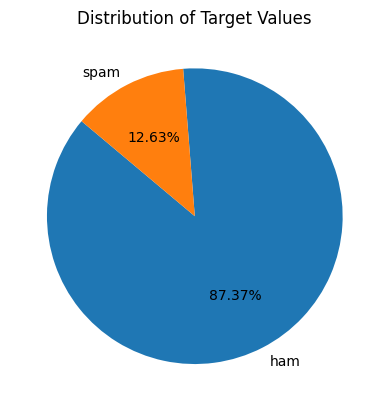

In [9]:
plt.pie(data['target'].value_counts().values, labels=['ham', 'spam'], autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Target Values')
plt.show()

In [10]:
data['characters'] = data['text'].apply(len)

In [11]:
import nltk
nltk.download('punkt')
data['words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1dile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
data['sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [13]:
data.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",109,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
data[data.columns[2:5]].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977559,18.455601,1.965564
std,58.236087,13.324685,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
# for ham 
data[data['target']==0][data.columns[2:5]].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.458813,17.123561,1.820195
std,56.357896,13.493865,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
# for spam 
data[data['target']==1][data.columns[2:5]].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

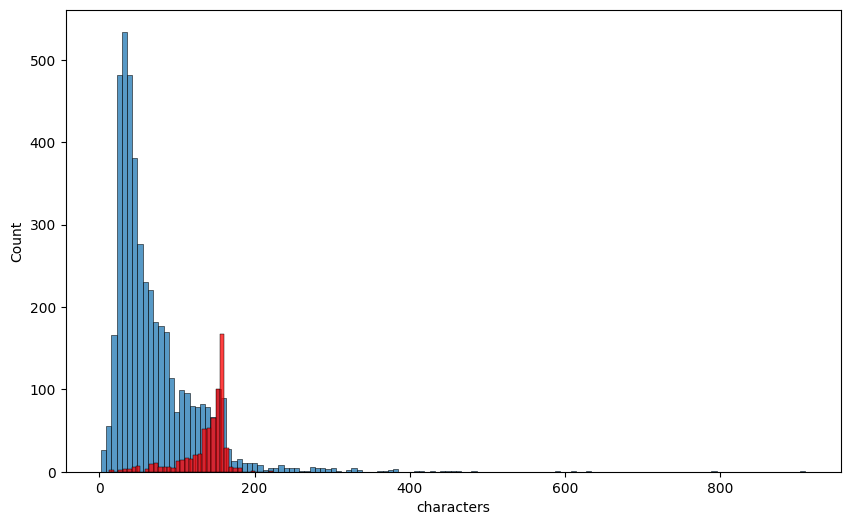

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['characters'])
sns.histplot(data[data['target']==1]['characters'], color='red')

<Axes: xlabel='words', ylabel='Count'>

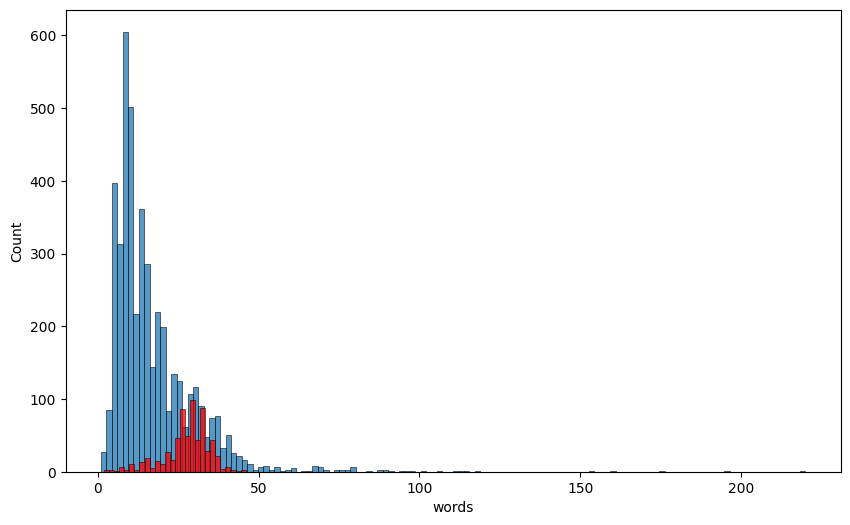

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['words'])
sns.histplot(data[data['target']==1]['words'], color='red')

<Axes: xlabel='sentences', ylabel='Count'>

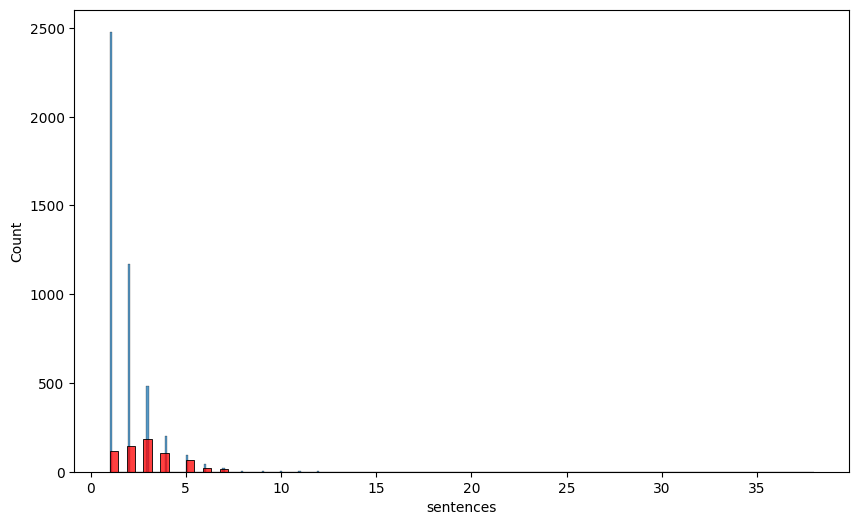

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['sentences'])
sns.histplot(data[data['target']==1]['sentences'], color='red')

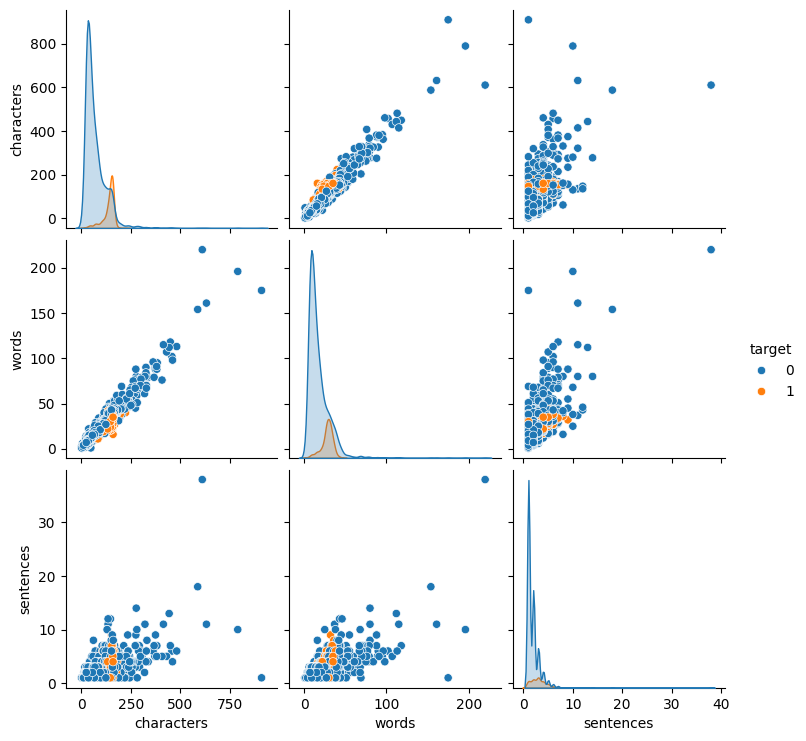

In [20]:
sns.pairplot(data,hue='target')

<Axes: >

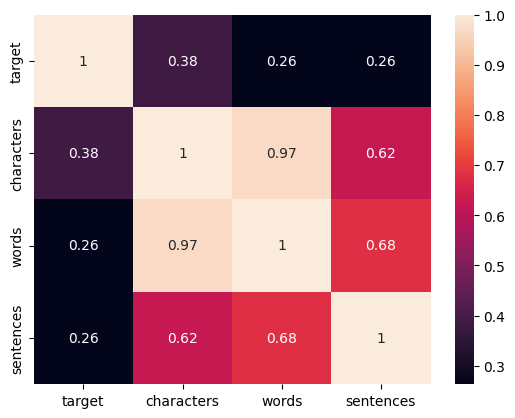

In [21]:
sns.heatmap(data.iloc[:, [0, 2, 3, 4]].corr(),annot=True)

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def convert(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    temp = []
    for i in text:
        if (i.isalnum() and (i not in stopwords.words('english') and string.punctuation)):
            temp.append(ps.stem(i))
    return " ".join(temp)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1dile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data['converted_text'] = data['text'].apply(convert)

In [24]:
data.head()

,target,text,characters,words,sentences,converted_text
0,0,"Go until jurong point, crazy.. Available only ...",109,23,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [25]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, max_font_size=200, colormap='viridis')

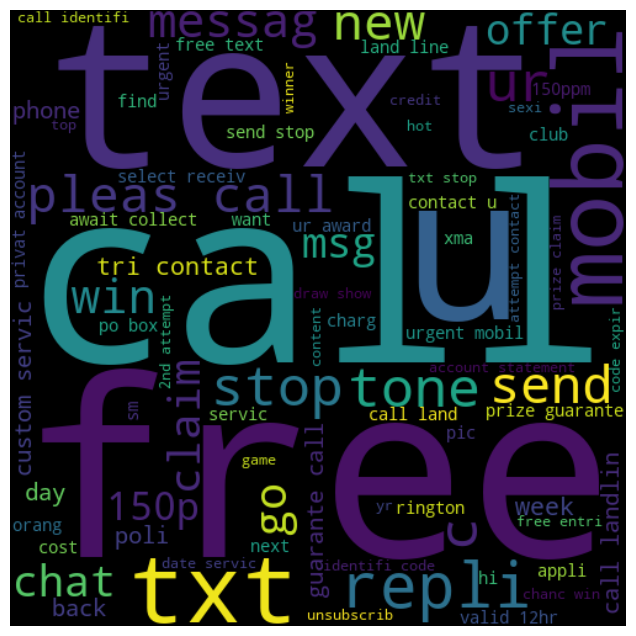

In [26]:
spam_msg = wc.generate(data[data['target']==1]['converted_text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(spam_msg, interpolation='bilinear')
plt.axis('off')  
plt.show()

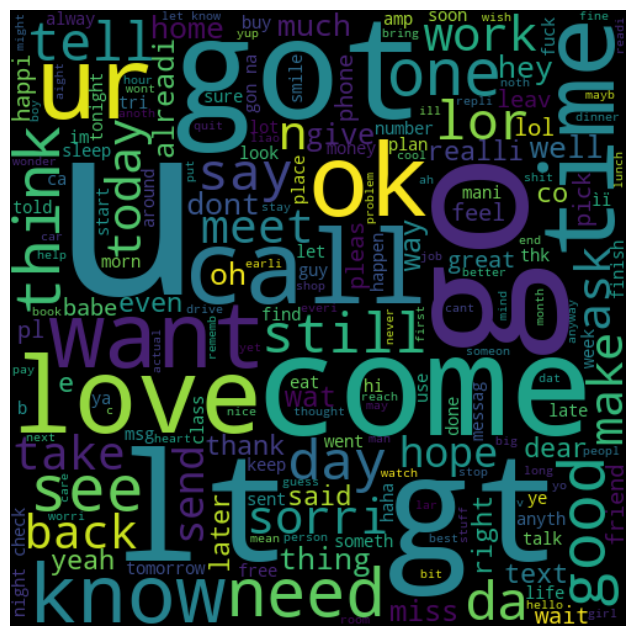

In [27]:
ham_msg = wc.generate(data[data['target']==0]['converted_text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(ham_msg, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [28]:
spam_corpus = []
for msg in data[data['target']==1]['converted_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

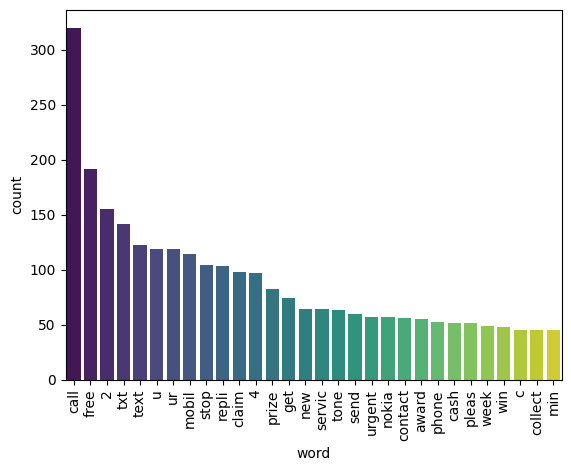

In [29]:
from collections import Counter 

spam_counter = Counter(spam_corpus)
spam_data = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_data, hue='word', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.show()

In [30]:
ham_corpus = []
for msg in data[data['target']==0]['converted_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

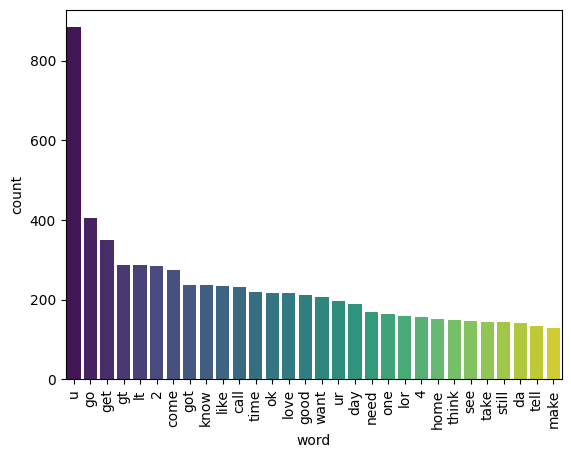

In [31]:
from collections import Counter 

ham_counter = Counter(ham_corpus)
ham_data = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=ham_data, hue='word', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfv = TfidfVectorizer(max_features=3000)

In [33]:
X1 = cv.fit_transform(data['converted_text']).toarray()
Y1 = data['target'].values

X2 = tfv.fit_transform(data['converted_text']).toarray()
Y2 = data['target'].values

In [34]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=2)

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y2,test_size=0.2,random_state=2)

In [35]:
# from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# gnb = GaussianNB()
# bnb = BernoulliNB()
# mnb = MultinomialNB()

In [36]:
# print("GaussianNB:")
# gnb.fit(X_train1,Y_train1)
# y_pred1 = gnb.predict(X_test1)
# print("accuracy_score :",accuracy_score(Y_test1,y_pred1))
# print("confusion_matrix:\n",confusion_matrix(Y_test1,y_pred1))
# print("precision_score :",precision_score(Y_test1,y_pred1))

# print("\nBernoulliNB:")
# bnb.fit(X_train1,Y_train1)
# y_pred2 = bnb.predict(X_test1)
# print("accuracy_score :",accuracy_score(Y_test1,y_pred2))
# print("confusion_matrix :\n",confusion_matrix(Y_test1,y_pred2))
# print("precision_score :",precision_score(Y_test1,y_pred2))

# print("\nMultinomialNB:")
# mnb.fit(X_train1,Y_train1)
# y_pred3 = mnb.predict(X_test1)
# print("accuracy_score :",accuracy_score(Y_test1,y_pred3))
# print("confusion_matrix :\n",confusion_matrix(Y_test1,y_pred3))
# print("precision_score :",precision_score(Y_test1,y_pred3))

In [37]:
# print("GaussianNB:")
# gnb.fit(X_train2,Y_train2)
# y_pred1 = gnb.predict(X_test2)
# print("accuracy_score :",accuracy_score(Y_test2,y_pred1))
# print("confusion_matrix :\n",confusion_matrix(Y_test2,y_pred1))
# print("precision_score :",precision_score(Y_test2,y_pred1))

# print("\nBernoulliNB:")
# bnb.fit(X_train2,Y_train2)
# y_pred2 = bnb.predict(X_test2)
# print("accuracy_score :",accuracy_score(Y_test2,y_pred2))
# print("confusion_matrix :\n",confusion_matrix(Y_test2,y_pred2))
# print("precision_score :",precision_score(Y_test2,y_pred2))

# print("\nMultinomialNB:")
# mnb.fit(X_train2,Y_train2)
# y_pred3 = mnb.predict(X_test2)
# print("accuracy_score :",accuracy_score(Y_test2,y_pred3))
# print("confusion_matrix :\n",confusion_matrix(Y_test2,y_pred3))
# print("precision_score :",precision_score(Y_test2,y_pred3))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [39]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [40]:
clfs = {
    'LogisticRegression'  : lrc, 
    'DecisionTreeClassifier'  : dtc, 
    'KNeighborsClassifier'  : knc, 
    'SVC' : svc,
    'MultinomialNB'  : mnb, 
    'RandomForestClassifier'  : rfc, 
    'AdaBoostClassifier': abc, 
    'BaggingClassifier' : bc, 
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier' :xgb
}

In [41]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    return accuracy,precision

In [42]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train2,Y_train2,X_test2,Y_test2) # we are using tfidf so X_train2,Y_train2
    print("\nAlgorithm :",name)
    print("Accuracy  :",current_accuracy)
    print("Precision :",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


Algorithm : LogisticRegression
Accuracy  : 0.9584139264990329
Precision : 0.9702970297029703

Algorithm : DecisionTreeClassifier
Accuracy  : 0.9274661508704062
Precision : 0.8118811881188119

Algorithm : KNeighborsClassifier
Accuracy  : 0.9052224371373307
Precision : 1.0

Algorithm : SVC
Accuracy  : 0.9758220502901354
Precision : 0.9747899159663865

Algorithm : MultinomialNB
Accuracy  : 0.9709864603481625
Precision : 1.0

Algorithm : RandomForestClassifier
Accuracy  : 0.9758220502901354
Precision : 0.9829059829059829

Algorithm : AdaBoostClassifier
Accuracy  : 0.9245647969052224
Precision : 0.8488372093023255

Algorithm : BaggingClassifier
Accuracy  : 0.9584139264990329
Precision : 0.8682170542635659

Algorithm : ExtraTreesClassifier
Accuracy  : 0.9748549323017408
Precision : 0.9745762711864406

Algorithm : GradientBoostingClassifier
Accuracy  : 0.9468085106382979
Precision : 0.9191919191919192

Algorithm : XGBClassifier
Accuracy  : 0.9642166344294004
Precision : 0.9243697478991597


In [43]:
data_performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

data_performance

,Algorithm,Accuracy,Precision
3,SVC,0.975822,0.974790
5,RandomForestClassifier,0.975822,0.982906
8,ExtraTreesClassifier,0.974855,0.974576
4,MultinomialNB,0.970986,1.000000
10,XGBClassifier,0.964217,0.924370
0,LogisticRegression,0.958414,0.970297
7,BaggingClassifier,0.958414,0.868217
9,GradientBoostingClassifier,0.946809,0.919192
1,DecisionTreeClassifier,0.927466,0.811881
6,AdaBoostClassifier,0.924565,0.848837


In [44]:
data_performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

data_performance

,Algorithm,Accuracy,Precision
2,KNeighborsClassifier,0.905222,1.000000
4,MultinomialNB,0.970986,1.000000
5,RandomForestClassifier,0.975822,0.982906
3,SVC,0.975822,0.974790
8,ExtraTreesClassifier,0.974855,0.974576
0,LogisticRegression,0.958414,0.970297
10,XGBClassifier,0.964217,0.924370
9,GradientBoostingClassifier,0.946809,0.919192
7,BaggingClassifier,0.958414,0.868217
6,AdaBoostClassifier,0.924565,0.848837


In [45]:
data_performance = pd.melt(data_performance, id_vars = "Algorithm")
data_performance

,Algorithm,variable,value
0,KNeighborsClassifier,Accuracy,0.905222
1,MultinomialNB,Accuracy,0.970986
2,RandomForestClassifier,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ExtraTreesClassifier,Accuracy,0.974855
5,LogisticRegression,Accuracy,0.958414
6,XGBClassifier,Accuracy,0.964217
7,GradientBoostingClassifier,Accuracy,0.946809
8,BaggingClassifier,Accuracy,0.958414
9,AdaBoostClassifier,Accuracy,0.924565


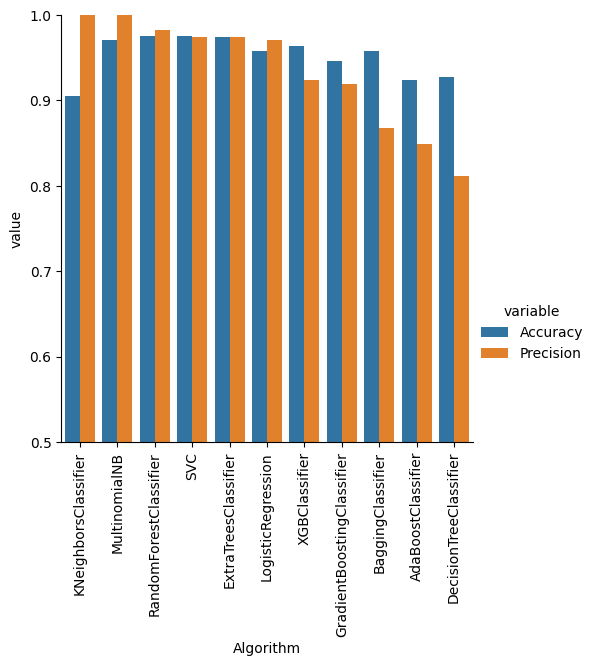

In [46]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=data_performance,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [47]:
# svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
# voting.fit(X_train2,Y_train2)
# y_pred = voting.predict(X_test2)
# print("Accuracy  :",accuracy_score(Y_test2,y_pred))
# print("Precision :",precision_score(Y_test2,y_pred))

In [48]:
# # Applying stacking
# from sklearn.ensemble import StackingClassifier

# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# clf.fit(X_train2,Y_train2)
# y_pred = clf.predict(X_test2)
# print("Accuracy  :",accuracy_score(Y_test2,y_pred))
# print("Precision :",precision_score(Y_test2,y_pred))

In [49]:
import pickle

pickle.dump(tfv, open('Output_file/tfidf_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('Output_file/mnb_model.pkl', 'wb'))